<center><h1> California Housing Project </h1></center>

Data sourced from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices)  
Original source of data: US 1990 Census

### Setup

In [101]:
import pandas as pd
import numpy as np
import sklearn
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from scipy.stats import randint
%matplotlib inline

In [2]:
# Reading in the data
data = pd.read_csv('housing.csv')
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

### Exploratory Data Analysis (EDA)

In [3]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


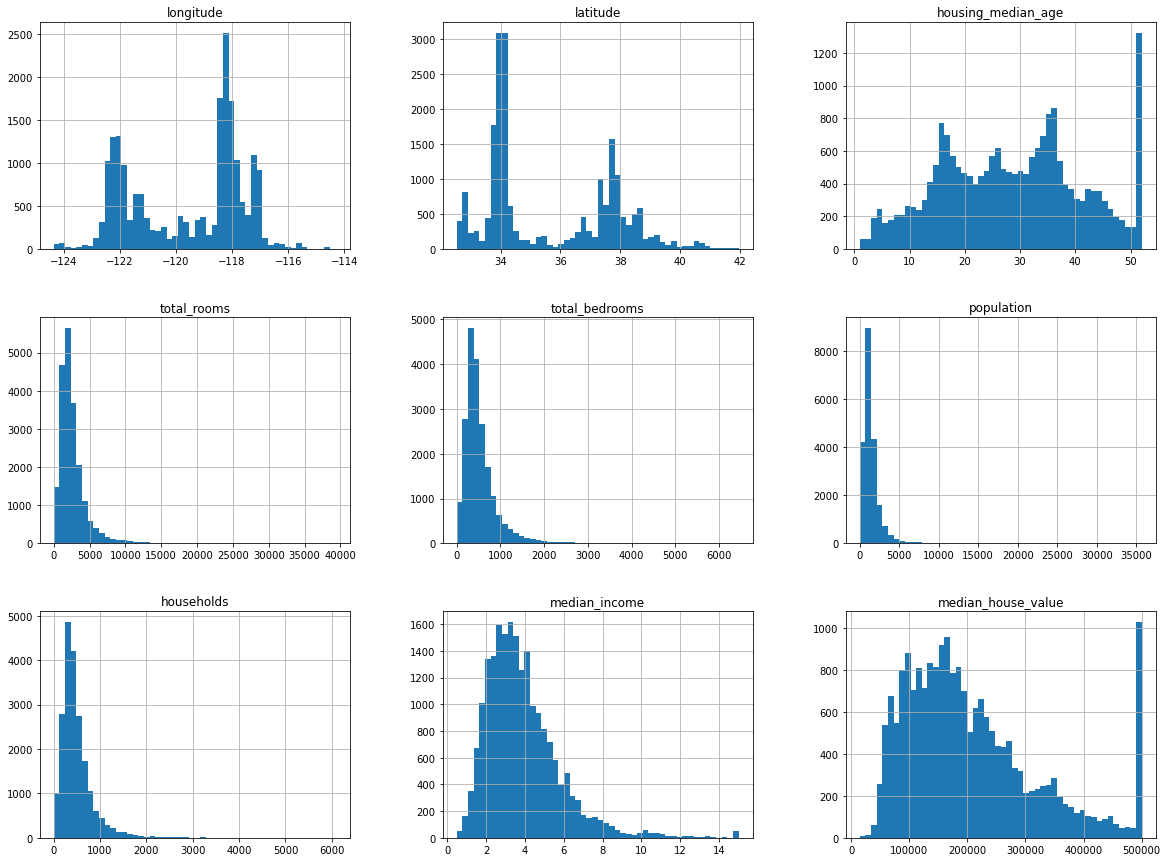

In [5]:
# sns.displot(data = data, x = 'total_rooms', kde = True)
data.hist(bins = 50, figsize = (20,15));
plt.show()

<AxesSubplot:>

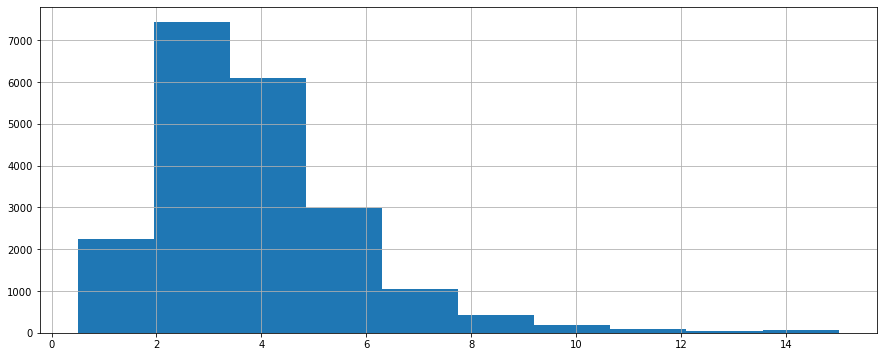

In [6]:
# Binning median income
plt.figure(figsize = (15,6))
data['median_income'].hist()

In [7]:
data['income_category'] = pd.cut(data['median_income'],
                                bins = [0, 1.5, 3, 4.5, 6, np.inf],
                                labels = [1, 2, 3, 4, 5])

In [8]:
data['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

### Splitting into train and test datasets

In [9]:
# Setting seed 
np.random.seed(2)

In [10]:
train_set, test_set = train_test_split(data, test_size = 0.2)

In [11]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2072     -119.84     36.77                 6.0       1853.0           473.0   
10600    -117.80     33.68                 8.0       2032.0           349.0   
2494     -120.19     36.60                25.0        875.0           214.0   
4284     -118.32     34.10                31.0        622.0           229.0   
16541    -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
1099     -121.90     39.59                20.0       1465.0           278.0   
18898    -122.25     38.11                49.0       2365.0           504.0   
11798    -121.22     38.92                19.0       2531.0           461.0   
6637     -118.14     34.16                39.0       2776.0           840.0   
2575     -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  \
2072       1397.0       417.0         1.4817             72000.0   
10600       862.0       340.0         6.9133            274100.0   
2494        931.0       214.0         1.5536             58300.0   
4284        597.0       227.0         1.5284            200000.0   
16541      1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
1099        745.0       250.0         3.0625             93800.0   
18898      1131.0       458.0         2.6133            103100.0   
11798      1206.0       429.0         4.4958            192600.0   
6637       2546.0       773.0         2.5750            153500.0   
2575       1259.0       420.0         2.2478             81100.0   

      ocean_proximity income_category  
2072           INLAND               1  
10600       <1H OCEAN               5  
2494           INLAND               2  
4284        <1H OCEAN               2  
16541          INLAND               3  
...               ...             ...  
1099           INLAND               3  
18898        NEAR BAY               2  
11798          INLAND               3  
6637        <1H OCEAN               2  
2575       NEAR OCEAN               2  

[16512 rows x 11 columns]

In [12]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

for train_index, test_index in split.split(data, data['income_category']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [13]:
strat_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2322     -119.71     36.83                15.0       2727.0           500.0   
2629     -124.19     40.73                21.0       5694.0          1056.0   
15807    -122.44     37.76                52.0       2110.0           454.0   
10607    -117.78     33.68                15.0       1834.0           330.0   
15104    -116.98     32.85                12.0       3570.0           713.0   
...          ...       ...                 ...          ...             ...   
8119     -118.19     33.80                36.0       2326.0           729.0   
10083    -120.21     39.35                 7.0        914.0           159.0   
1730     -122.35     37.98                34.0       3756.0           726.0   
13230    -117.64     34.15                16.0       2896.0           404.0   
20208    -119.21     34.31                22.0       7548.0          1038.0   

       population  households  median_income  median_house_value  \
2322       1228.0       436.0         3.5078            109000.0   
2629       2907.0       972.0         3.5363             90100.0   
15807       816.0       438.0         3.9079            370000.0   
10607       841.0       309.0         6.0634            234300.0   
15104      3321.0       666.0         4.0882            134500.0   
...           ...         ...            ...                 ...   
8119       2635.0       657.0         2.1985            141800.0   
10083        85.0        34.0         4.7917            187500.0   
1730       2237.0       686.0         3.7562            132900.0   
13230      1165.0       379.0         6.4559            392900.0   
20208      2855.0      1008.0         6.7290            409300.0   

      ocean_proximity income_category  
2322           INLAND               3  
2629       NEAR OCEAN               3  
15807        NEAR BAY               3  
10607       <1H OCEAN               5  
15104       <1H OCEAN               3  
...               ...             ...  
8119       NEAR OCEAN               2  
10083          INLAND               4  
1730         NEAR BAY               3  
13230          INLAND               5  
20208      NEAR OCEAN               5  

[16512 rows x 11 columns]

#### Checking that stratified split worked as intended

In [14]:
data['income_category'].value_counts()/len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

In [15]:
strat_train_set['income_category'].value_counts()/len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_category, dtype: float64

In [16]:
def income_proportions(dataset):
    return dataset['income_category'].value_counts()/len(dataset)

In [17]:
comparison_df = pd.DataFrame({
    'Overall':income_proportions(data),
    'Random':income_proportions(test_set),
    'Stratified':income_proportions(strat_test_set)
}).sort_index()

comparison_df['Random % Error'] = 100 * comparison_df['Random']/comparison_df['Overall'] - 100
comparison_df['Stratified % Error'] = 100 * comparison_df['Stratified']/comparison_df['Overall'] - 100

In [18]:
comparison_df

Overall    Random  Stratified  Random % Error  Stratified % Error
1  0.039826  0.038760    0.039971       -2.676399            0.364964
2  0.318847  0.312984    0.318798       -1.838626           -0.015195
3  0.350581  0.348353    0.350533       -0.635710           -0.013820
4  0.176308  0.187258    0.176357        6.210497            0.027480
5  0.114438  0.112645    0.114341       -1.566469           -0.084674

### Visualizing data

In [19]:
# Creating a copy of the stratified training set to use 
housing = strat_train_set.copy()

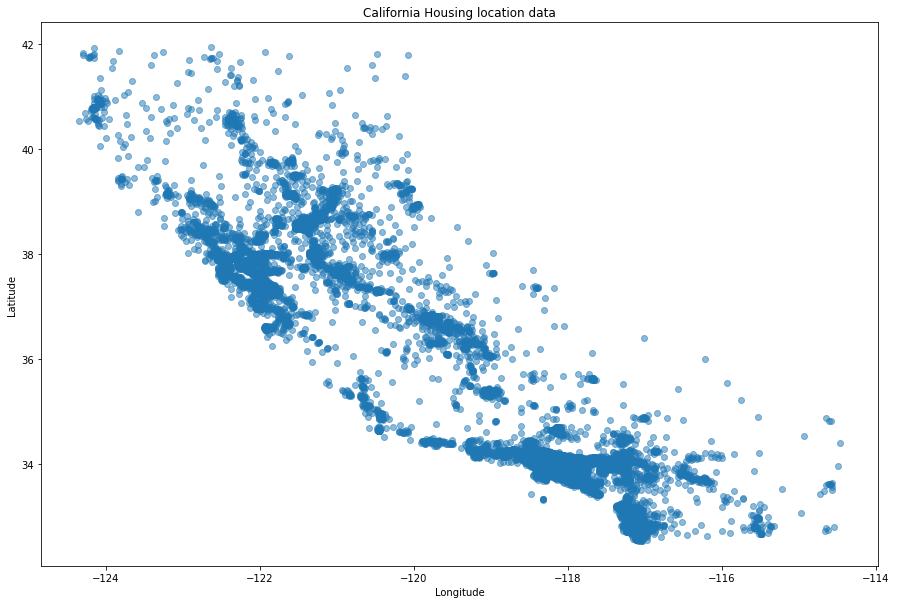

In [20]:
plt.figure(figsize = [15,10])
plt.scatter(x = housing.longitude, y = housing.latitude, alpha = 0.5)
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('California Housing location data');

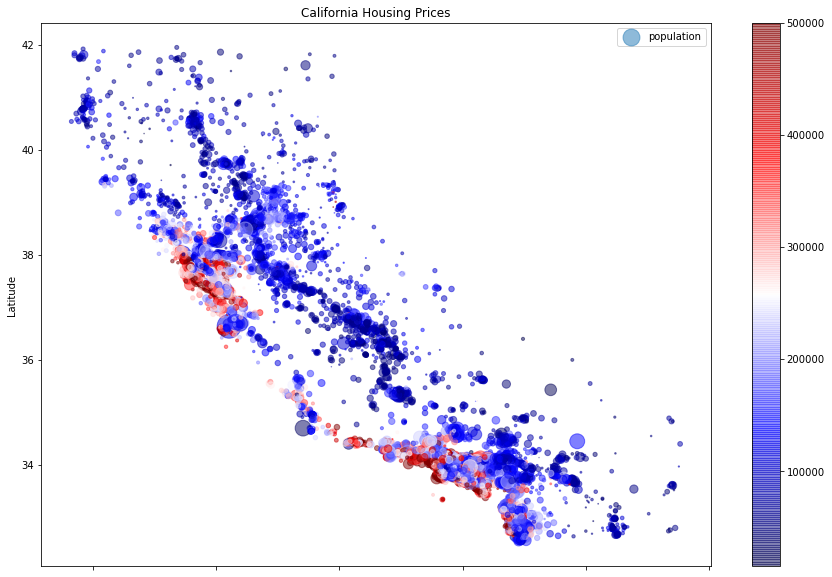

In [21]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.5,
           c = housing.median_house_value, cmap = 'seismic', colorbar = True, 
             s = housing['population']/50, label = 'population',
             figsize = [15,10])
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('California Housing Prices');
plt.show()

In [22]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690524
total_rooms           0.137290
housing_median_age    0.102961
households            0.068062
total_bedrooms        0.051273
population           -0.022572
longitude            -0.047721
latitude             -0.142323
Name: median_house_value, dtype: float64

In [24]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category'],
      dtype='object')

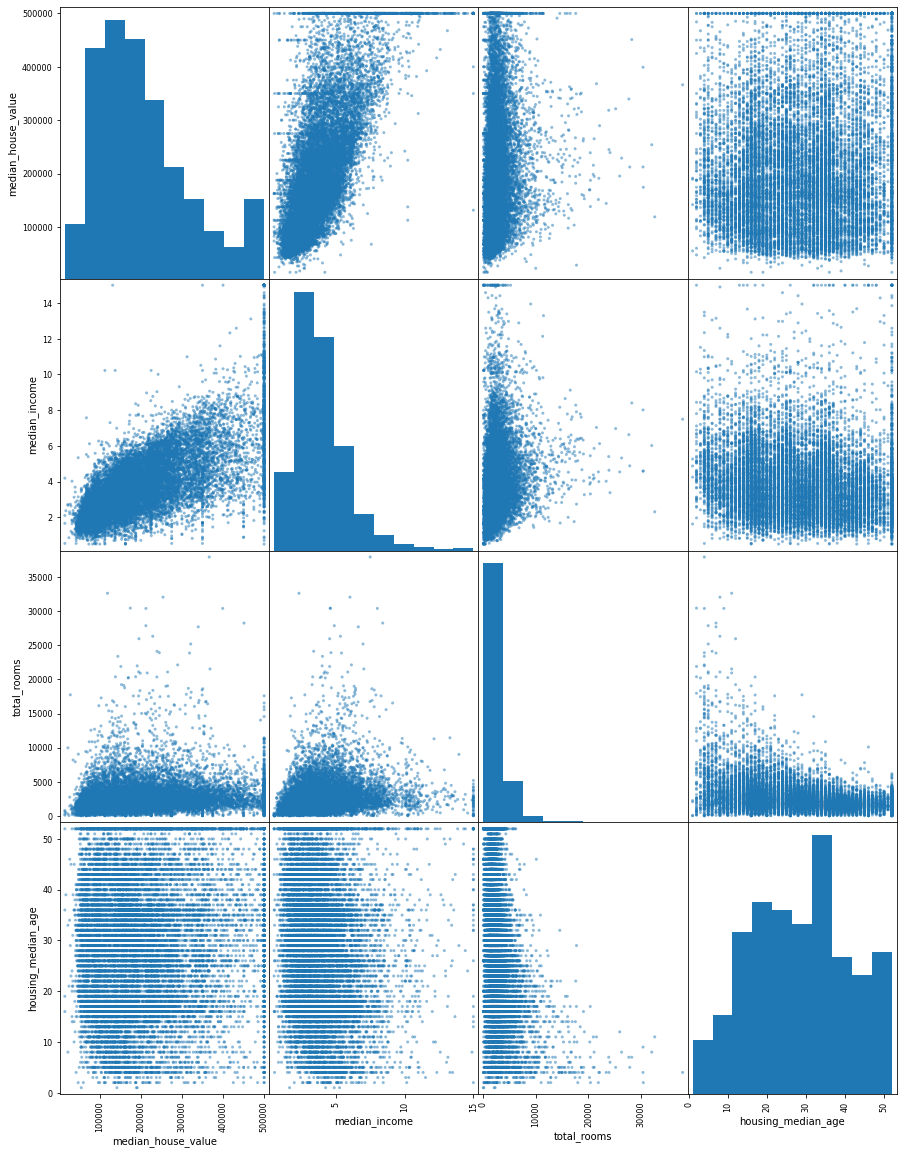

In [27]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = [15,20]);

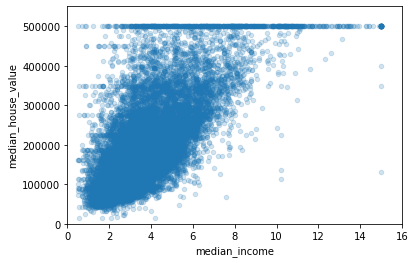

In [29]:
housing.plot(kind = 'scatter', x ='median_income', y = 'median_house_value', alpha = 0.2)
plt.axis([0,16,0,550000]);

### Creating new attributes 

In [30]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['pop_per_house'] = housing['population']/housing['households']
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2322     -119.71     36.83                15.0       2727.0           500.0   
2629     -124.19     40.73                21.0       5694.0          1056.0   
15807    -122.44     37.76                52.0       2110.0           454.0   
10607    -117.78     33.68                15.0       1834.0           330.0   
15104    -116.98     32.85                12.0       3570.0           713.0   
...          ...       ...                 ...          ...             ...   
8119     -118.19     33.80                36.0       2326.0           729.0   
10083    -120.21     39.35                 7.0        914.0           159.0   
1730     -122.35     37.98                34.0       3756.0           726.0   
13230    -117.64     34.15                16.0       2896.0           404.0   
20208    -119.21     34.31                22.0       7548.0          1038.0   

       population  households  median_income  median_house_value  \
2322       1228.0       436.0         3.5078            109000.0   
2629       2907.0       972.0         3.5363             90100.0   
15807       816.0       438.0         3.9079            370000.0   
10607       841.0       309.0         6.0634            234300.0   
15104      3321.0       666.0         4.0882            134500.0   
...           ...         ...            ...                 ...   
8119       2635.0       657.0         2.1985            141800.0   
10083        85.0        34.0         4.7917            187500.0   
1730       2237.0       686.0         3.7562            132900.0   
13230      1165.0       379.0         6.4559            392900.0   
20208      2855.0      1008.0         6.7290            409300.0   

      ocean_proximity income_category  rooms_per_house  bedrooms_per_room  \
2322           INLAND               3         6.254587           0.183352   
2629       NEAR OCEAN               3         5.858025           0.185458   
15807        NEAR BAY               3         4.817352           0.215166   
10607       <1H OCEAN               5         5.935275           0.179935   
15104       <1H OCEAN               3         5.360360           0.199720   
...               ...             ...              ...                ...   
8119       NEAR OCEAN               2         3.540335           0.313414   
10083          INLAND               4        26.882353           0.173961   
1730         NEAR BAY               3         5.475219           0.193291   
13230          INLAND               5         7.641161           0.139503   
20208      NEAR OCEAN               5         7.488095           0.137520   

       pop_per_house  
2322        2.816514  
2629        2.990741  
15807       1.863014  
10607       2.721683  
15104       4.986486  
...              ...  
8119        4.010654  
10083       2.500000  
1730        3.260933  
13230       3.073879  
20208       2.832341  

[16512 rows x 14 columns]

In [31]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690524
rooms_per_house       0.147773
total_rooms           0.137290
housing_median_age    0.102961
households            0.068062
total_bedrooms        0.051273
pop_per_house        -0.022261
population           -0.022572
longitude            -0.047721
latitude             -0.142323
bedrooms_per_room    -0.260917
Name: median_house_value, dtype: float64

### Preprocessing for ML

In [34]:
# Replacing the housing variable with parameters used to predict house prices
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

In [38]:
# Using imputation to replace NA values with medians
imputer = SimpleImputer(strategy = 'median')

In [39]:
housing_numeric = housing.drop('ocean_proximity', axis = 1)
housing_numeric

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2322     -119.71     36.83                15.0       2727.0           500.0   
2629     -124.19     40.73                21.0       5694.0          1056.0   
15807    -122.44     37.76                52.0       2110.0           454.0   
10607    -117.78     33.68                15.0       1834.0           330.0   
15104    -116.98     32.85                12.0       3570.0           713.0   
...          ...       ...                 ...          ...             ...   
8119     -118.19     33.80                36.0       2326.0           729.0   
10083    -120.21     39.35                 7.0        914.0           159.0   
1730     -122.35     37.98                34.0       3756.0           726.0   
13230    -117.64     34.15                16.0       2896.0           404.0   
20208    -119.21     34.31                22.0       7548.0          1038.0   

       population  households  median_income income_category  
2322       1228.0       436.0         3.5078               3  
2629       2907.0       972.0         3.5363               3  
15807       816.0       438.0         3.9079               3  
10607       841.0       309.0         6.0634               5  
15104      3321.0       666.0         4.0882               3  
...           ...         ...            ...             ...  
8119       2635.0       657.0         2.1985               2  
10083        85.0        34.0         4.7917               4  
1730       2237.0       686.0         3.7562               3  
13230      1165.0       379.0         6.4559               5  
20208      2855.0      1008.0         6.7290               5  

[16512 rows x 9 columns]

In [40]:
imputer.fit(housing_numeric)

SimpleImputer(strategy='median')

In [41]:
# Checking if it worked properly
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2122.    ,  435.    , 1167.    ,
        409.    ,    3.5394,    3.    ])

In [42]:
housing_numeric.median()

longitude             -118.4900
latitude                34.2600
housing_median_age      29.0000
total_rooms           2122.0000
total_bedrooms         435.0000
population            1167.0000
households             409.0000
median_income            3.5394
dtype: float64

In [43]:
X = imputer.transform(housing_numeric)

In [45]:
housing_tr = pd.DataFrame(X, columns = housing_numeric.columns, index = housing_numeric.index)

### Handling categorical data

In [46]:
housing_categorical = housing[['ocean_proximity']]
housing_categorical

ocean_proximity
2322           INLAND
2629       NEAR OCEAN
15807        NEAR BAY
10607       <1H OCEAN
15104       <1H OCEAN
...               ...
8119       NEAR OCEAN
10083          INLAND
1730         NEAR BAY
13230          INLAND
20208      NEAR OCEAN

[16512 rows x 1 columns]

In [48]:
ordinal = OrdinalEncoder()
housing_cat_encoded = ordinal.fit_transform(housing_categorical)
housing_cat_encoded

array([[1.],
       [4.],
       [3.],
       ...,
       [3.],
       [1.],
       [4.]])

In [51]:
cat_encoder = OneHotEncoder(sparse = False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [55]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [56]:
housing_extra_attribs

array([[-119.71, 36.83, 15.0, ..., 3, 6.254587155963303,
        2.81651376146789],
       [-124.19, 40.73, 21.0, ..., 3, 5.8580246913580245,
        2.990740740740741],
       [-122.44, 37.76, 52.0, ..., 3, 4.8173515981735155,
        1.8630136986301369],
       ...,
       [-122.35, 37.98, 34.0, ..., 3, 5.475218658892128,
        3.260932944606414],
       [-117.64, 34.15, 16.0, ..., 5, 7.641160949868074,
        3.073878627968338],
       [-119.21, 34.31, 22.0, ..., 5, 7.488095238095238,
        2.8323412698412698]], dtype=object)

Converting the numpy array to a DataFrame with column names

In [57]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
2322    -119.71    36.83               15.0      2727.0          500.0   
2629    -124.19    40.73               21.0      5694.0         1056.0   
15807   -122.44    37.76               52.0      2110.0          454.0   
10607   -117.78    33.68               15.0      1834.0          330.0   
15104   -116.98    32.85               12.0      3570.0          713.0   

      population households median_income ocean_proximity income_category  \
2322      1228.0      436.0        3.5078          INLAND               3   
2629      2907.0      972.0        3.5363      NEAR OCEAN               3   
15807      816.0      438.0        3.9079        NEAR BAY               3   
10607      841.0      309.0        6.0634       <1H OCEAN               5   
15104     3321.0      666.0        4.0882       <1H OCEAN               3   

      rooms_per_household population_per_household  
2322             6.254587                 2.816514  
2629             5.858025                 2.990741  
15807            4.817352                 1.863014  
10607            5.935275                 2.721683  
15104             5.36036                 4.986486

### Transformation Pipelines 

Creating the pipeline for numeric transformations

In [61]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribute_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])

housing_numeric_tr = num_pipeline.fit_transform(housing_numeric)

In [62]:
housing_numeric_tr

array([[-0.06887589,  0.56077624, -1.08443301, ...,  0.32131489,
        -0.02497742, -0.48710026],
       [-2.30225545,  2.38720364, -0.60790758, ...,  0.16705099,
        -0.00995831, -0.45341431],
       [-1.42984156,  0.99630893,  1.85414048, ..., -0.23777375,
        -0.1071732 ,  0.02160411],
       ...,
       [-1.38497456,  1.09933817,  0.42456419, ...,  0.01813837,
         0.01333341, -0.32817609],
       [ 0.96306511, -0.6943072 , -1.00501211, ...,  0.86069597,
        -0.00279147, -1.18823763],
       [ 0.18038522, -0.61937684, -0.52848667, ...,  0.80115298,
        -0.02361302, -1.21994373]])

Preparing the final pipeline

In [64]:
num_attribs = list(housing_numeric)
cat_attribs = ['ocean_proximity']

full_pipe = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepped = full_pipe.fit_transform(housing)

In [65]:
housing_prepped

array([[-0.06887589,  0.56077624, -1.08443301, ...,  0.        ,
         0.        ,  0.        ],
       [-2.30225545,  2.38720364, -0.60790758, ...,  0.        ,
         0.        ,  1.        ],
       [-1.42984156,  0.99630893,  1.85414048, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.38497456,  1.09933817,  0.42456419, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.96306511, -0.6943072 , -1.00501211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18038522, -0.61937684, -0.52848667, ...,  0.        ,
         0.        ,  1.        ]])

### Modeling

Linear Regression

In [67]:
lin_reg = LinearRegression()

lin_reg.fit(housing_prepped, housing_labels)

LinearRegression()

In [70]:
random_data = housing.iloc[:5]
random_labels = housing_labels.iloc[:5]
random_data_prepped = full_pipe.transform(random_data)

print('Predictions:\n', lin_reg.predict(random_data_prepped))

Predictions:
 [124385.60102613 190429.03385119 280858.61387993 299420.14381984
 141783.62027379]


In [73]:
print('Actual values:\n', list(random_labels[:5]))

Actual values:
 [109000.0, 90100.0, 370000.0, 234300.0, 134500.0]


Root Mean Squared Error

In [74]:
housing_predictions = lin_reg.predict(housing_prepped)
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
lin_rmse

67340.9652908009

Decision Tree

In [76]:
tree_reg = DecisionTreeRegressor(random_state = 2)
tree_reg.fit(housing_prepped, housing_labels)

DecisionTreeRegressor(random_state=2)

In [77]:
housing_predictions = tree_reg.predict(housing_prepped)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
tree_rmse

0.0

### Cross Validation

In [80]:
scores = cross_val_score(tree_reg, housing_prepped, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [82]:
def display_scores(scores):
    print("Scores:", scores)
    print("\nMean:", scores.mean())
    print("\nStandard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67206.31387008 73385.19331406 72498.63441509 70365.87540394
 72524.92219729 71669.18897017 72593.66983323 67538.81430049
 65415.56198182 69649.86079376]

Mean: 70284.80350799391

Standard deviation: 2606.065538584511


In [83]:
lin_scores = cross_val_score(lin_reg, housing_prepped, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68364.07737378 67268.16029456 68113.86869769 65914.01665301
 70583.17003299 67533.93303137 66830.21410592 66608.28181268
 65143.5311856  69473.47788666]

Mean: 67583.27310742709

Standard deviation: 1543.4259561928345


In [85]:
forest_reg = RandomForestRegressor(random_state = 2)
forest_reg.fit(housing_prepped, housing_labels)

RandomForestRegressor(random_state=2)

In [86]:
housing_predictions = forest_reg.predict(housing_prepped)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
forest_rmse

18457.76425512849

In [87]:
forest_scores = cross_val_score(forest_reg, housing_prepped, housing_labels,
                               scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51073.2698841  50717.72532251 50434.95648905 44962.72474524
 52520.34108798 48900.95804946 50739.57555617 48897.81083437
 46191.77371582 50625.22310082]

Mean: 49506.43587855202

Standard deviation: 2213.811381503398


In [89]:
scores = cross_val_score(lin_reg, housing_prepped, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     67583.273107
std       1626.913807
min      65143.531186
25%      66663.764886
50%      67401.046663
75%      68301.525205
max      70583.170033
dtype: float64

Support Vector Regression

In [92]:
svm_reg = SVR(kernel = 'linear')
svm_reg.fit(housing_prepped, housing_labels)
housing_predictions = svm_reg.predict(housing_prepped)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
svm_rmse

106505.38782605968

### Fine-Tuning

Grid Search

In [95]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor(random_state = 2)

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(housing_prepped, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=2)

In [99]:
cvresults = grid_search.cv_results_

for mean_score, params in zip(cvresults['mean_test_score'], cvresults['params']):
    print(np.sqrt(-mean_score), params)

64279.566733985426 {'max_features': 2, 'n_estimators': 3}
55021.688813627596 {'max_features': 2, 'n_estimators': 10}
52686.65213491154 {'max_features': 2, 'n_estimators': 30}
61356.3600204919 {'max_features': 4, 'n_estimators': 3}
53441.57713288548 {'max_features': 4, 'n_estimators': 10}
51057.96391679891 {'max_features': 4, 'n_estimators': 30}
58794.059912574696 {'max_features': 6, 'n_estimators': 3}
52571.30787852545 {'max_features': 6, 'n_estimators': 10}
50588.55651224496 {'max_features': 6, 'n_estimators': 30}
58386.52643638907 {'max_features': 8, 'n_estimators': 3}
52627.27689779523 {'max_features': 8, 'n_estimators': 10}
50402.84057786802 {'max_features': 8, 'n_estimators': 30}
62221.39669340811 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54300.89494243853 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61104.54101609364 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52834.031450964794 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [100]:
pd.DataFrame(cvresults)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.040809      0.001471         0.002601        0.000490   
1        0.132630      0.000801         0.007602        0.000490   
2        0.411762      0.022616         0.022605        0.002333   
3        0.069618      0.001358         0.002800        0.000400   
4        0.230545      0.009344         0.008803        0.001721   
5        0.659349      0.013032         0.021207        0.000399   
6        0.094021      0.001415         0.002602        0.000491   
7        0.309870      0.005981         0.007602        0.000490   
8        0.917006      0.013078         0.022005        0.000633   
9        0.122427      0.005005         0.003201        0.000400   
10       0.407692      0.011606         0.008802        0.000749   
11       1.184363      0.020961         0.021805        0.000748   
12       0.067999      0.003361         0.003001        0.000633   
13       0.215592      0.004535         0.008998        0.000633   
14       0.091082      0.005198         0.003801        0.000400   
15       0.286664      0.005887         0.009002        0.000633   
16       0.106624      0.001625         0.003201        0.000400   
17       0.366082      0.007129         0.010202        0.001166   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  2                  3           False   
13                  2                 10           False   
14                  3                  3           False   
15                  3                 10           False   
16                  4                  3           False   
17                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -4.202169e+09   
1             {'max_features': 2, 'n_estimators': 10}      -3.080423e+09   
2             {'max_features': 2, 'n_estimators': 30}      -2.835858e+09   
3              {'max_features': 4, 'n_estimators': 3}      -3.730604e+09   
4             {'max_features': 4, 'n_estimators': 10}      -2.899731e+09   
5             {'max_features': 4, 'n_estimators': 30}      -2.659925e+09   
6              {'max_features': 6, 'n_estimators': 3}      -3.542337e+09   
7             {'max_features': 6, 'n_estimators': 10}      -2.851980e+09   
8             {'max_features': 6, 'n_estimators': 30}      -2.647783e+09   
9              {'max_features': 8, 'n_estimators': 3}      -3.364190e+09   
10            {'max_features': 8, 'n_estimators': 10}      -2.815375e+09   
11            {'max_features': 8, 'n_estimators': 30}      -2.598274e+09   
12  {'bootstrap': False, 'max_features': 2, 'n_est...      -3.907507e+09   
13  {'bootstrap': False, 'max_features': 2, 'n_est...      -2.980595e+09   
14  {'bootstrap': False, 'max_features': 3, 'n_est...      -3.696038e+09   
15  {'bootstrap': False, 'max_features': 3, 'n_est...      -2.749210e+09   
16  {'bootstrap': False, 'max_features': 4, 'n_est...      -3.441352e+09   
17  {'bootstrap': False, 'max_features': 4, 'n_est...      -2.802361e+09   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0       -4.186057e+09  ...    -4.131863e+09  

### Randomized Search

In [102]:
param_distribs = {
    'n_estimators':randint(low = 1, high = 200),
    'max_features':randint(low = 1, high = 8),
}

forest_reg = RandomForestRegressor(random_state = 2)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                               n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state = 2)

rnd_search.fit(housing_prepped, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000274B3601100>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000274B4AFF340>},
                   random_state=2, scoring='neg_mean_squared_error')

In [103]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

56066.56392029033 {'max_features': 1, 'n_estimators': 16}
49764.385631968114 {'max_features': 6, 'n_estimators': 73}
50156.8180827615 {'max_features': 7, 'n_estimators': 44}
50949.33001269642 {'max_features': 3, 'n_estimators': 76}
58746.97664521266 {'max_features': 1, 'n_estimators': 8}
50491.303432889195 {'max_features': 3, 'n_estimators': 178}
50452.95558709904 {'max_features': 4, 'n_estimators': 48}
50557.60935994099 {'max_features': 3, 'n_estimators': 149}
49670.28682421729 {'max_features': 5, 'n_estimators': 117}
49622.67698831923 {'max_features': 6, 'n_estimators': 168}


### Analyzing Best Models and Errors

In [104]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.50691883e-02, 5.71403528e-02, 4.53294648e-02, 1.55176285e-02,
       1.58002632e-02, 1.60361453e-02, 1.44288186e-02, 3.12108822e-01,
       1.60633533e-01, 2.84249051e-02, 1.05184204e-01, 2.76449874e-02,
       5.76689655e-03, 1.24824233e-01, 1.49210591e-04, 2.43933892e-03,
       3.50200880e-03])

In [106]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipe.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31210882218831315, 'median_income'),
 (0.1606335327866932, 'income_category'),
 (0.12482423268637097, 'INLAND'),
 (0.1051842035906863, 'pop_per_hhold'),
 (0.06506918827410584, 'longitude'),
 (0.05714035275985592, 'latitude'),
 (0.04532946479029143, 'housing_median_age'),
 (0.028424905083408548, 'rooms_per_hhold'),
 (0.027644987388745084, 'bedrooms_per_room'),
 (0.016036145312950847, 'population'),
 (0.015800263175165277, 'total_bedrooms'),
 (0.015517628457902864, 'total_rooms'),
 (0.014428818637572663, 'households'),
 (0.0057668965547357206, '<1H OCEAN'),
 (0.0035020088032375286, 'NEAR OCEAN'),
 (0.0024393389191791704, 'NEAR BAY'),
 (0.00014921059078549983, 'ISLAND')]

### Evaluating on test set

In [107]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipe.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [108]:
final_rmse

51302.81353243804